In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
height_ds = pd.read_csv('/content/drive/MyDrive/Data Projects/Height vs Weather/average-height-by-country-2024.csv')


In [5]:
height_ds.head(5)

,country,AverageHeightBoysAge19,AverageHeightGirlsAge19,AvgHgtBoysAge19,AvgHgtGirlsAge19,AverageHeightBoysAge15,AverageHeightGirlsAge15,AverageHeightBoysAge10,AverageHeightGirlsAge10,AverageHeightBoysAge5,AverageHeightGirlsAge5
0,India,166.50,155.18,166.50,155.18,159.01,152.39,132.57,132.85,107.07,107.19
1,China,175.66,163.46,175.66,163.46,171.23,162.44,141.87,143.40,113.41,114.91
2,Indonesia,166.26,154.36,166.26,154.36,160.52,153.02,132.30,133.46,107.83,107.55
3,Pakistan,167.33,154.77,167.33,154.77,161.13,152.45,133.97,133.03,108.11,105.45
4,Nigeria,171.55,158.14,171.55,158.14,160.12,154.20,133.01,132.85,109.79,107.59


In [6]:
temperature_ds = pd.read_csv('/content/drive/MyDrive/Data Projects/Height vs Weather/average-monthly-surface-temperature.csv')

In [7]:
temperature_ds.head(5)

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1
0,Afghanistan,AFG,1940,1940-01-15,-2.032494,11.327695
1,Afghanistan,AFG,1940,1940-02-15,-0.733503,11.327695
2,Afghanistan,AFG,1940,1940-03-15,1.999134,11.327695
3,Afghanistan,AFG,1940,1940-04-15,10.199754,11.327695
4,Afghanistan,AFG,1940,1940-05-15,17.942135,11.327695


In [8]:
metadata_ds = pd.read_json('/content/drive/MyDrive/Data Projects/Height vs Weather/average-monthly-surface-temperature.metadata.json')

In [9]:
metadata_ds.head(20)

,chart,columns,dateDownloaded,activeFilters
title,Average monthly surface temperature,NaN,2024-12-16,NaN
subtitle,The temperature of the air measured 2 meters a...,NaN,2024-12-16,NaN
citation,Contains modified Copernicus Climate Change Se...,NaN,2024-12-16,NaN
originalChartUrl,https://ourworldindata.org/grapher/average-mon...,NaN,2024-12-16,NaN
selection,[World],NaN,2024-12-16,NaN
Average surface temperature,NaN,"{'titleShort': 'Annual average', 'titleLong': ...",2024-12-16,NaN


In [10]:
temperature_ds.dtypes

,0
Entity,object
Code,object
year,int64
Day,object
Average surface temperature,float64
Average surface temperature.1,float64


In [11]:
temperature_2023_ds = temperature_ds[temperature_ds['year'] == 2023]

In [12]:
temperature_2023_ds.head(5)

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1
996,Afghanistan,AFG,2023,2023-01-15,-4.335608,13.836377
997,Afghanistan,AFG,2023,2023-02-15,4.187041,13.836377
998,Afghanistan,AFG,2023,2023-03-15,10.105444,13.836377
999,Afghanistan,AFG,2023,2023-04-15,14.277164,13.836377
1000,Afghanistan,AFG,2023,2023-05-15,19.078170,13.836377


In [13]:
temp_year_avg_2023 = temperature_2023_ds.groupby('Entity')['Average surface temperature'].mean()

In [14]:
temp_year_avg_2023.head(10)

,Average surface temperature
Entity,
Afghanistan,13.836378
Albania,13.822665
Algeria,24.873967
American Samoa,27.005758
Andorra,7.266988
Angola,22.796457
Anguilla,26.732320
Antigua and Barbuda,26.694234
Argentina,15.652064


In [15]:
temp_year_avg_2023 = temp_year_avg_2023.to_frame()

In [16]:
temp23_vs_height24_ds = height_ds.merge(temp_year_avg_2023, left_on = 'country', right_on = 'Entity', how = 'right')

In [17]:
temp23_vs_height24_ds.head(10)

,country,AverageHeightBoysAge19,AverageHeightGirlsAge19,AvgHgtBoysAge19,AvgHgtGirlsAge19,AverageHeightBoysAge15,AverageHeightGirlsAge15,AverageHeightBoysAge10,AverageHeightGirlsAge10,AverageHeightBoysAge5,AverageHeightGirlsAge5,Average surface temperature
0,Afghanistan,168.50,156.11,168.50,156.11,161.75,151.22,132.95,130.38,106.17,103.59,13.836378
1,Albania,174.07,162.23,174.07,162.23,169.54,160.75,142.06,141.33,117.20,115.70,13.822665
2,Algeria,175.04,162.35,175.04,162.35,166.34,160.36,137.29,140.46,110.52,112.61,24.873967
3,American Samoa,177.09,167.55,177.09,167.55,171.42,164.77,142.72,144.53,115.78,116.06,27.005758
4,Andorra,178.84,165.53,178.84,165.53,172.09,162.92,143.11,142.86,116.30,114.35,7.266988
5,Angola,168.46,158.10,168.46,158.10,162.09,155.78,133.27,135.91,106.41,107.47,22.796457
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.732320
7,Antigua and Barbuda,178.84,165.72,178.84,165.72,173.52,163.00,145.61,142.94,119.43,114.74,26.694234
8,Argentina,174.75,161.22,174.75,161.22,170.69,160.64,143.30,142.15,114.20,111.87,15.652064
9,Armenia,173.67,159.85,173.67,159.85,167.45,157.57,138.96,137.77,112.61,109.51,8.116077


In [18]:
import matplotlib.pyplot as plt


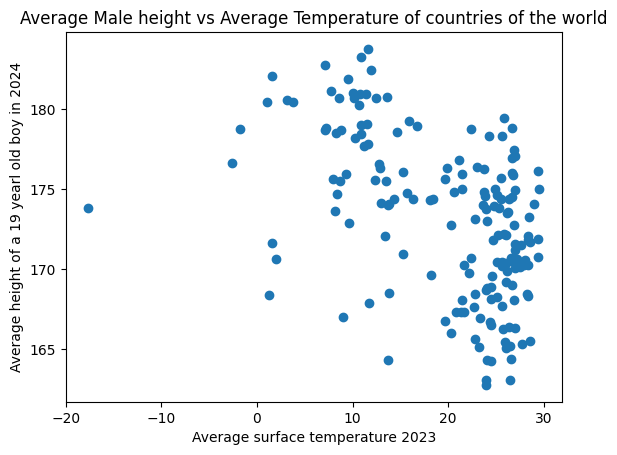

In [19]:
plt.scatter(temp23_vs_height24_ds['Average surface temperature'], temp23_vs_height24_ds['AvgHgtBoysAge19'])
plt.xlabel('Average surface temperature 2023')
plt.ylabel('Average height of a 19 yearl old boy in 2024')
plt.title('Average Male height vs Average Temperature of countries of the world')
plt.show()

In [20]:
temp23_vs_height24_ds['normalized_temp'] = (temp23_vs_height24_ds['Average surface temperature'] - 14).abs()

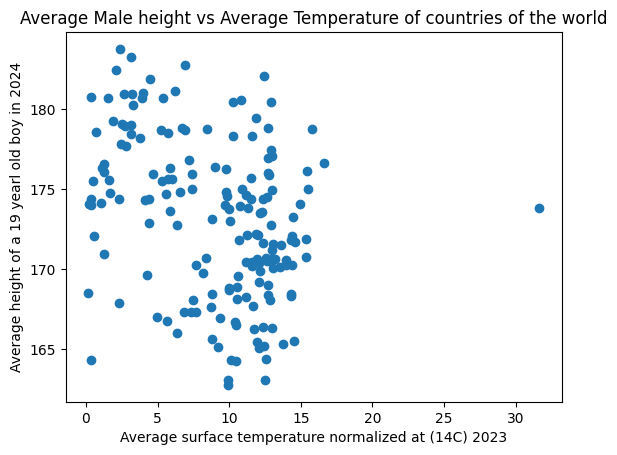

In [21]:
plt.scatter(temp23_vs_height24_ds['normalized_temp'], temp23_vs_height24_ds['AvgHgtBoysAge19'])
plt.xlabel('Average surface temperature normalized at (14C) 2023')
plt.ylabel('Average height of a 19 yearl old boy in 2024')
plt.title('Average Male height vs Average Temperature of countries of the world')
plt.show()

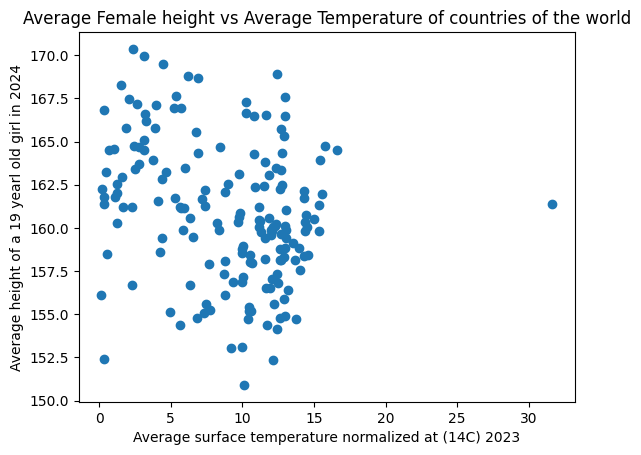

In [22]:
plt.scatter(temp23_vs_height24_ds['normalized_temp'], temp23_vs_height24_ds['AvgHgtGirlsAge19'])
plt.xlabel('Average surface temperature normalized at (14C) 2023')
plt.ylabel('Average height of a 19 yearl old girl in 2024')
plt.title('Average Female height vs Average Temperature of countries of the world')
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [24]:
model_ds = temp23_vs_height24_ds.dropna()

X_male = model_ds['Average surface temperature']
Y = model_ds['AvgHgtBoysAge19']

X_male_const = sm.add_constant(X_male)

model_male = sm.OLS(Y, X_male_const).fit()

print(model_male.summary())



                            OLS Regression Results                            
Dep. Variable:        AvgHgtBoysAge19   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     54.40
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           6.87e-12
Time:                        03:25:38   Log-Likelihood:                -495.14
No. Observations:                 172   AIC:                             994.3
Df Residuals:                     170   BIC:                             1001.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [25]:
X = model_ds['normalized_temp']
Y = model_ds['AvgHgtGirlsAge19']

X = sm.add_constant(X)

model_female = sm.OLS(Y, X).fit()

print(model_female.summary())

                            OLS Regression Results                            
Dep. Variable:       AvgHgtGirlsAge19   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     12.93
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           0.000424
Time:                        03:25:38   Log-Likelihood:                -477.59
No. Observations:                 172   AIC:                             959.2
Df Residuals:                     170   BIC:                             965.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             162.8657      0.632    2

In [26]:
r_squared = model_male.rsquared
p_value = model_male.pvalues['Average surface temperature']
print(r_squared, p_value)

0.24242862369385043 6.8742118680765115e-12


In [27]:
pip install pycountry-convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 17.5 MB/s eta 0:00:00


In [28]:
import pycountry_convert as pc
from matplotlib.lines import Line2D

In [29]:
def country_to_continent(country_name):
    try:
        # Get alpha-2 country code
        country_code = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        # Convert to continent name
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return 'Unknown'

# Example
print(country_to_continent('India'))  # Output: Asia
print(country_to_continent('Germany'))  # Output: Europe

Asia
Europe


In [30]:
temp23_vs_height24_ds['continent'] = temp23_vs_height24_ds['country'].apply(country_to_continent)
temp23_vs_height24_ds.head(5)

,country,AverageHeightBoysAge19,AverageHeightGirlsAge19,AvgHgtBoysAge19,AvgHgtGirlsAge19,AverageHeightBoysAge15,AverageHeightGirlsAge15,AverageHeightBoysAge10,AverageHeightGirlsAge10,AverageHeightBoysAge5,AverageHeightGirlsAge5,Average surface temperature,normalized_temp,continent
0,Afghanistan,168.50,156.11,168.50,156.11,161.75,151.22,132.95,130.38,106.17,103.59,13.836378,0.163622,Asia
1,Albania,174.07,162.23,174.07,162.23,169.54,160.75,142.06,141.33,117.20,115.70,13.822665,0.177335,Europe
2,Algeria,175.04,162.35,175.04,162.35,166.34,160.36,137.29,140.46,110.52,112.61,24.873967,10.873967,Africa
3,American Samoa,177.09,167.55,177.09,167.55,171.42,164.77,142.72,144.53,115.78,116.06,27.005758,13.005758,Oceania
4,Andorra,178.84,165.53,178.84,165.53,172.09,162.92,143.11,142.86,116.30,114.35,7.266988,6.733012,Europe


In [31]:
# Define a color mapping for each continent
continent_colors = {
    'Asia': 'red',
    'Europe': 'blue',
    'Africa': 'green',
    'North America': 'orange',
    'South America': 'purple',
    'Oceania': 'cyan',
    'Unknown': 'gray'
}

# Map continent column to colors
colors = temp23_vs_height24_ds['continent'].map(continent_colors)

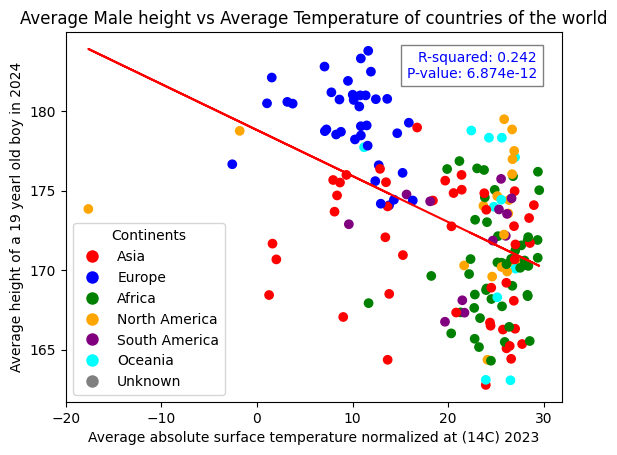

In [32]:
plt.scatter(temp23_vs_height24_ds['Average surface temperature'], temp23_vs_height24_ds['AvgHgtBoysAge19'], c=colors)
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=col, markersize=10, label=cont)
                   for cont, col in continent_colors.items()]
plt.legend(handles=legend_elements, title="Continents", loc="lower left")
plt.plot(X_male, model_male.predict(X_male_const), color='red', label='Fitted Line')
plt.text(0.95, 0.95,
         f'R-squared: {r_squared:.3f}\nP-value: {p_value:.3e}',
         fontsize=10, color='blue',
         bbox=dict(facecolor='white', alpha=0.5),
         ha='right', va='top', transform=plt.gca().transAxes)
plt.xlabel('Average absolute surface temperature normalized at (14C) 2023')
plt.ylabel('Average height of a 19 yearl old boy in 2024')
plt.title('Average Male height vs Average Temperature of countries of the world')
plt.show()

In [33]:
temp23_vs_height24_ds.to_csv('/content/drive/MyDrive/Data Projects/Height vs Weather/Average_Temperature2023_vs_Average_Height2024.csv')


In [34]:
temperature_ds.head(5)

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1
0,Afghanistan,AFG,1940,1940-01-15,-2.032494,11.327695
1,Afghanistan,AFG,1940,1940-02-15,-0.733503,11.327695
2,Afghanistan,AFG,1940,1940-03-15,1.999134,11.327695
3,Afghanistan,AFG,1940,1940-04-15,10.199754,11.327695
4,Afghanistan,AFG,1940,1940-05-15,17.942135,11.327695


In [35]:
temperature_ds['date'] = pd.to_datetime(temperature_ds['Day'], format='%Y-%m-%d')
temperature_ds['month'] = temperature_ds['date'].dt.month
temperature_ds['day'] = temperature_ds['date'].dt.day

In [36]:
temperature_ds.head(5)

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1,date,month,day
0,Afghanistan,AFG,1940,1940-01-15,-2.032494,11.327695,1940-01-15,1,15
1,Afghanistan,AFG,1940,1940-02-15,-0.733503,11.327695,1940-02-15,2,15
2,Afghanistan,AFG,1940,1940-03-15,1.999134,11.327695,1940-03-15,3,15
3,Afghanistan,AFG,1940,1940-04-15,10.199754,11.327695,1940-04-15,4,15
4,Afghanistan,AFG,1940,1940-05-15,17.942135,11.327695,1940-05-15,5,15


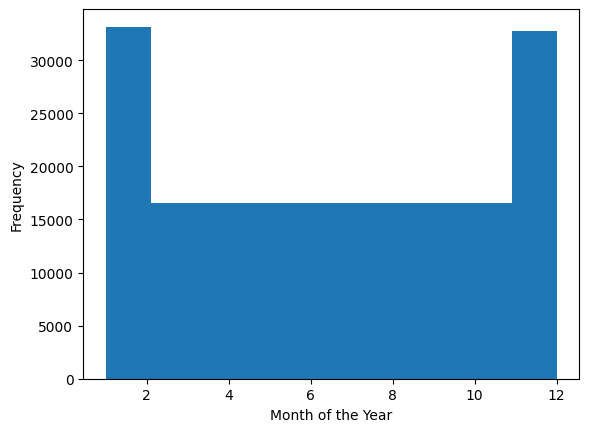

In [37]:
plt.hist(temperature_ds['month'])
plt.xlabel('Month of the Year')
plt.ylabel('Frequency')
plt.show()

In [38]:
temp_by_month = temperature_ds.groupby(['Entity', 'month'])['Average surface temperature'].mean().reset_index()

temperature_ds = temperature_ds.merge(temp_by_month, on=['Entity', 'month'], suffixes=('', '_avg'))

temperature_ds['avg_surface_temp_month'] = temperature_ds['Average surface temperature_avg']

temperature_ds.drop(columns=['Average surface temperature_avg'], inplace=True)

In [39]:
temperature_ds.head(5)

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1,date,month,day,avg_surface_temp_month
0,Afghanistan,AFG,1940,1940-01-15,-2.032494,11.327695,1940-01-15,1,15,-1.896828
1,Afghanistan,AFG,1940,1940-02-15,-0.733503,11.327695,1940-02-15,2,15,0.348513
2,Afghanistan,AFG,1940,1940-03-15,1.999134,11.327695,1940-03-15,3,15,5.963915
3,Afghanistan,AFG,1940,1940-04-15,10.199754,11.327695,1940-04-15,4,15,12.520753
4,Afghanistan,AFG,1940,1940-05-15,17.942135,11.327695,1940-05-15,5,15,18.270178


In [40]:
tempMonth_vs_height24_ds = temp_by_month.merge(temp23_vs_height24_ds, left_on = 'Entity', right_on = 'country', how = 'left', suffixes=('_month', ''))

In [41]:
tempMonth_vs_height24_ds.head(5)

,Entity,month,Average surface temperature_month,country,AverageHeightBoysAge19,AverageHeightGirlsAge19,AvgHgtBoysAge19,AvgHgtGirlsAge19,AverageHeightBoysAge15,AverageHeightGirlsAge15,AverageHeightBoysAge10,AverageHeightGirlsAge10,AverageHeightBoysAge5,AverageHeightGirlsAge5,Average surface temperature,normalized_temp,continent
0,Afghanistan,1,-1.896828,Afghanistan,168.5,156.11,168.5,156.11,161.75,151.22,132.95,130.38,106.17,103.59,13.836378,0.163622,Asia
1,Afghanistan,2,0.348513,Afghanistan,168.5,156.11,168.5,156.11,161.75,151.22,132.95,130.38,106.17,103.59,13.836378,0.163622,Asia
2,Afghanistan,3,5.963915,Afghanistan,168.5,156.11,168.5,156.11,161.75,151.22,132.95,130.38,106.17,103.59,13.836378,0.163622,Asia
3,Afghanistan,4,12.520753,Afghanistan,168.5,156.11,168.5,156.11,161.75,151.22,132.95,130.38,106.17,103.59,13.836378,0.163622,Asia
4,Afghanistan,5,18.270178,Afghanistan,168.5,156.11,168.5,156.11,161.75,151.22,132.95,130.38,106.17,103.59,13.836378,0.163622,Asia


In [42]:
def label_season(month):
    if month in [10, 11, 12, 1, 2, 3]:
        return 'Winter'
    elif month in [4, 5, 6, 7, 8, 9]:
        return 'Summer'
    else:
        return 'Unknown'

tempMonth_vs_height24_ds['season'] = tempMonth_vs_height24_ds['month'].apply(label_season)

In [43]:
tempMonth_vs_height24_ds.head(5)

,Entity,month,Average surface temperature_month,country,AverageHeightBoysAge19,AverageHeightGirlsAge19,AvgHgtBoysAge19,AvgHgtGirlsAge19,AverageHeightBoysAge15,AverageHeightGirlsAge15,AverageHeightBoysAge10,AverageHeightGirlsAge10,AverageHeightBoysAge5,AverageHeightGirlsAge5,Average surface temperature,normalized_temp,continent,season
0,Afghanistan,1,-1.896828,Afghanistan,168.5,156.11,168.5,156.11,161.75,151.22,132.95,130.38,106.17,103.59,13.836378,0.163622,Asia,Winter
1,Afghanistan,2,0.348513,Afghanistan,168.5,156.11,168.5,156.11,161.75,151.22,132.95,130.38,106.17,103.59,13.836378,0.163622,Asia,Winter
2,Afghanistan,3,5.963915,Afghanistan,168.5,156.11,168.5,156.11,161.75,151.22,132.95,130.38,106.17,103.59,13.836378,0.163622,Asia,Winter
3,Afghanistan,4,12.520753,Afghanistan,168.5,156.11,168.5,156.11,161.75,151.22,132.95,130.38,106.17,103.59,13.836378,0.163622,Asia,Summer
4,Afghanistan,5,18.270178,Afghanistan,168.5,156.11,168.5,156.11,161.75,151.22,132.95,130.38,106.17,103.59,13.836378,0.163622,Asia,Summer


In [44]:
temp_by_season = tempMonth_vs_height24_ds.groupby(['Entity', 'season'])['Average surface temperature_month'].mean()

In [45]:
temp_by_season.head(5)

Entity       season
Afghanistan  Summer    20.145231
             Winter     3.972032
Albania      Summer    17.947667
             Winter     6.653617
Algeria      Summer    29.685865
Name: Average surface temperature_month, dtype: float64

In [46]:
temp_by_season = temp_by_season.to_frame() if isinstance(temp_by_season, pd.Series) else temp_by_season
tempMonth_vs_height24_ds = tempMonth_vs_height24_ds.to_frame() if isinstance(tempMonth_vs_height24_ds, pd.Series) else tempMonth_vs_height24_ds

In [47]:
tempSeason_vs_height24_ds = temp_by_season.merge(tempMonth_vs_height24_ds, on = ['Entity', 'season'], how = 'left', suffixes=('_season', ''))

In [48]:
tempSeason_vs_height24_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    2340 non-null   object 
 1   season                                    2340 non-null   object 
 2   Average surface temperature_month_season  2340 non-null   float64
 3   month                                     2340 non-null   int32  
 4   Average surface temperature_month         2340 non-null   float64
 5   country                                   2064 non-null   object 
 6   AverageHeightBoysAge19                    2064 non-null   float64
 7   AverageHeightGirlsAge19                   2064 non-null   float64
 8   AvgHgtBoysAge19                           2064 non-null   float64
 9   AvgHgtGirlsAge19                          2064 non-null   float64
 10  AverageHeightBoysAge15              

In [49]:
tempSeason_vs_height24_ds.to_csv('/content/drive/MyDrive/Data Projects/Height vs Weather/Average_Temperature_month_season_year2023_vs_Average_Height2024.csv')


In [65]:
model_ds = tempSeason_vs_height24_ds.dropna()
model_ds = model_ds[model_ds['season'] == 'Winter']

In [68]:
X = model_ds['Average surface temperature_month_season']
Y = model_ds['AvgHgtBoysAge19']

X = sm.add_constant(X)

model_winter = sm.OLS(Y, X).fit()

print(model_winter.summary())

                            OLS Regression Results                            
Dep. Variable:        AvgHgtBoysAge19   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     383.6
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           7.52e-73
Time:                        03:33:20   Log-Likelihood:                -2950.7
No. Observations:                1032   AIC:                             5905.
Df Residuals:                    1030   BIC:                             5915.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [58]:
model_ds = tempSeason_vs_height24_ds.dropna()
model_ds = model_ds[model_ds['season'] == 'Summer']

In [63]:
X = model_ds['Average surface temperature_month_season']
Y = model_ds['AvgHgtBoysAge19']

X = sm.add_constant(X)

model_summer = sm.OLS(Y, X).fit()

print(model_summer.summary())

                            OLS Regression Results                            
Dep. Variable:        AvgHgtBoysAge19   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     190.6
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           6.56e-40
Time:                        03:32:41   Log-Likelihood:                -3026.5
No. Observations:                1032   AIC:                             6057.
Df Residuals:                    1030   BIC:                             6067.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------